# Retrieving ASIS data locally with gee python API and R
## Introduction
In this notebook we will explore how to get ASIS data through the gee python API and geemap, but we will be using these two python libraries in R, thanks to the reticulate package, which offer an interface for running python code in R. 

## Set up

1) Use conda to manage environments and install R, python and required packages. A brief Intro to working with conda is given [here](https://github.com/RSO9192/conda_R)
2) Request access to ASIS data to giews1@fao.org

In [5]:
# Specify which python to use. This depends on your own configuration
Sys.setenv(RETICULATE_PYTHON = "/home/riccardo/mambaforge/envs/R4/bin/python")
library(reticulate)
library(terra)
library(tidyverse)
library(sf)
library(tmap)
library(rnaturalearth)

In [3]:
# Import libraries and authenticate to gee
ee = import("ee")
geemap = import("geemap") # also install geopandas

ee$Authenticate()
ee$Initialize()

[1] TRUE

### Download the Weighted Mean Health Vegetation Index (mVHI)
Information on ASIS datasets available in gee can be found [here](https://www.fao.org/giews/earthobservation/access.jsp?lang=en). 

Now let's download mVHI for Somalia (Season 1 and cropland)

In [16]:
# let's define the region
somalia=ne_states(country="Somalia")
min_lon <- st_bbox(somalia)$xmin
max_lon <- st_bbox(somalia)$xmax
min_lat <- st_bbox(somalia)$ymin
max_lat <- st_bbox(somalia)$ymax

region = ee$Geometry$BBox(min_lon, min_lat, max_lon, max_lat)

In [7]:
asset="projects/UNFAO/ASIS/MVHI_A/MVHI_A_1984_S1_C"

mVHI_1984= ee$Image(asset)  

geemap$download_ee_image(mVHI_1984, "/home/riccardo/Desktop/mVHI_1984_S1_crop.tif", scale=1000, region=region, crs="EPSG:4326")

## Now let's plot the results using tmap

In [17]:
mVHI_1984_tif= rast("/home/riccardo/Desktop/mVHI_1984_S1_crop.tif") %>% 
crop(somalia, mask=T)
# NA values are set to 255, so we set everything above 1 as NA
mVHI_1984_tif <- ifel(mVHI_1984_tif > 1, NA, mVHI_1984_tif)

stars object downsampled to 862 by 1160 cells. See tm_shape manual (argument raster.downsample)



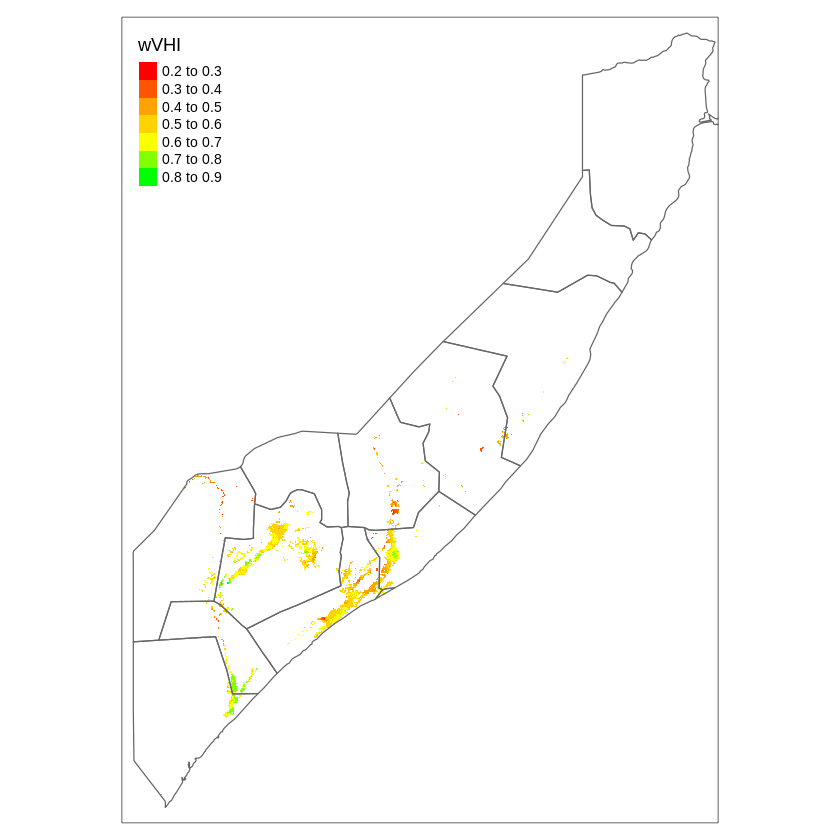

In [18]:
tm_shape(mVHI_1984_tif)+
 tm_raster(palette=c("red", "orange", "yellow", "green"), title="wVHI")+
  tm_shape(somalia)+
  tm_borders()